### Essential Libraries

In [64]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

### Dataset Import

In [42]:
data_dir = '../../res/ready_to_use'

In [67]:
chicago = pd.read_csv(
    data_dir + '/chicago.csv',
    encoding= 'unicode_escape')
chicago_copy = chicago.copy()
chicago.head()



,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,...,NOT_RIGHT_OF_WAY_I,PRIM_CONTRIBUTORY_CAUSE,STREET_DIRECTION,DOORING_I,WORK_ZONE_I,NUM_UNITS,MOST_SEVERE_INJURY,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH
0,15,NO CONTROLS,NO CONTROLS,CLEAR,['DARKNESS'],FIXED OBJECT,ALLEY,"('STRAIGHT', 'LEVEL')",DRY,NO DEFECTS,...,N,UNABLE TO DETERMINE,W,N,"('N',)",1,NO INDICATION OF INJURY,2,Tuesday,5
1,20,NO CONTROLS,NO CONTROLS,CLEAR,"['DARKNESS', 'LIGHTED ROAD']",FIXED OBJECT,NOT DIVIDED,"('STRAIGHT', 'LEVEL')",DRY,NO DEFECTS,...,N,UNABLE TO DETERMINE,W,N,"('N',)",1,NO INDICATION OF INJURY,1,Tuesday,5
2,30,NO CONTROLS,NO CONTROLS,CLEAR,"['DARKNESS', 'LIGHTED ROAD']",FIXED OBJECT,DIVIDED - W/MEDIAN BARRIER,"('STRAIGHT', 'LEVEL')",DRY,NO DEFECTS,...,N,FAILING TO YIELD RIGHT-OF-WAY,W,N,"('N',)",2,NO INDICATION OF INJURY,0,Tuesday,5
3,30,NO CONTROLS,NO CONTROLS,CLEAR,"['DARKNESS', 'LIGHTED ROAD']",SIDESWIPE SAME DIRECTION,NOT DIVIDED,"('STRAIGHT', 'LEVEL')",DRY,NO DEFECTS,...,N,FAILING TO YIELD RIGHT-OF-WAY,W,N,"('N',)",2,NO INDICATION OF INJURY,22,Monday,5
4,35,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,"['DARKNESS', 'LIGHTED ROAD']",ANGLE,FOUR WAY,"('STRAIGHT', 'LEVEL')",DRY,NO DEFECTS,...,N,UNABLE TO DETERMINE,N,N,"('N',)",2,NO INDICATION OF INJURY,21,Monday,5


### Exploratory Data Analysis (EDA)

Các hàm vẽ đồ thị:

In [23]:
def histogram(df, colname, num_bins=20, figsize=(10, 5)):
  _, ax = plt.subplots(figsize=figsize)
  x_locator = ticker.AutoLocator()
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  ax.xaxis.set_major_locator(x_locator)
  plt.tight_layout()
  plt.show()

In [56]:
def categorical_histogram(df, colname, figsize=(30, 10), mpl_palette_name='Dark2', direction='h', top_values = None):
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  if top_values != None:
    bars = df[colname].value_counts()[:top_values]
  if direction == 'h':
    plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  else:
    plt.bar(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.show()

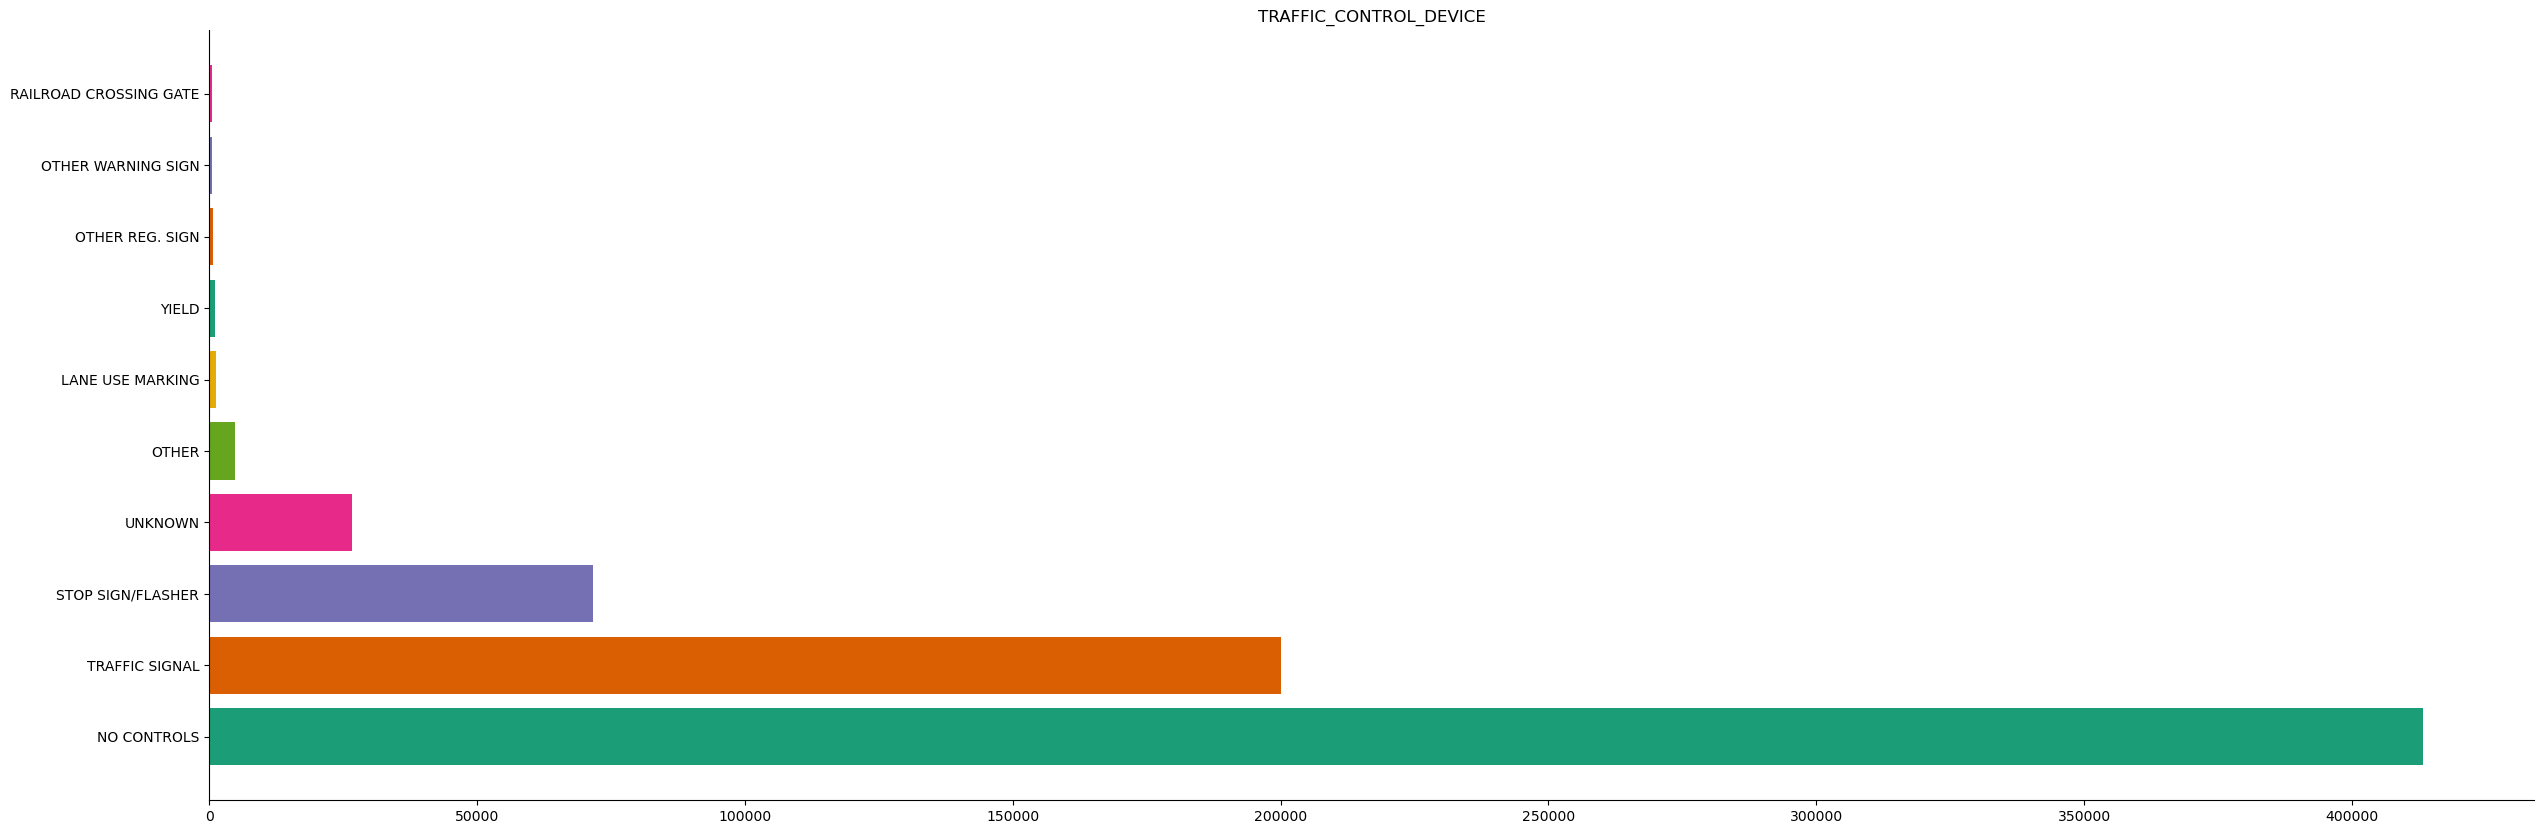

In [57]:
categorical_histogram(chicago, *['TRAFFIC_CONTROL_DEVICE'], top_values = 10)

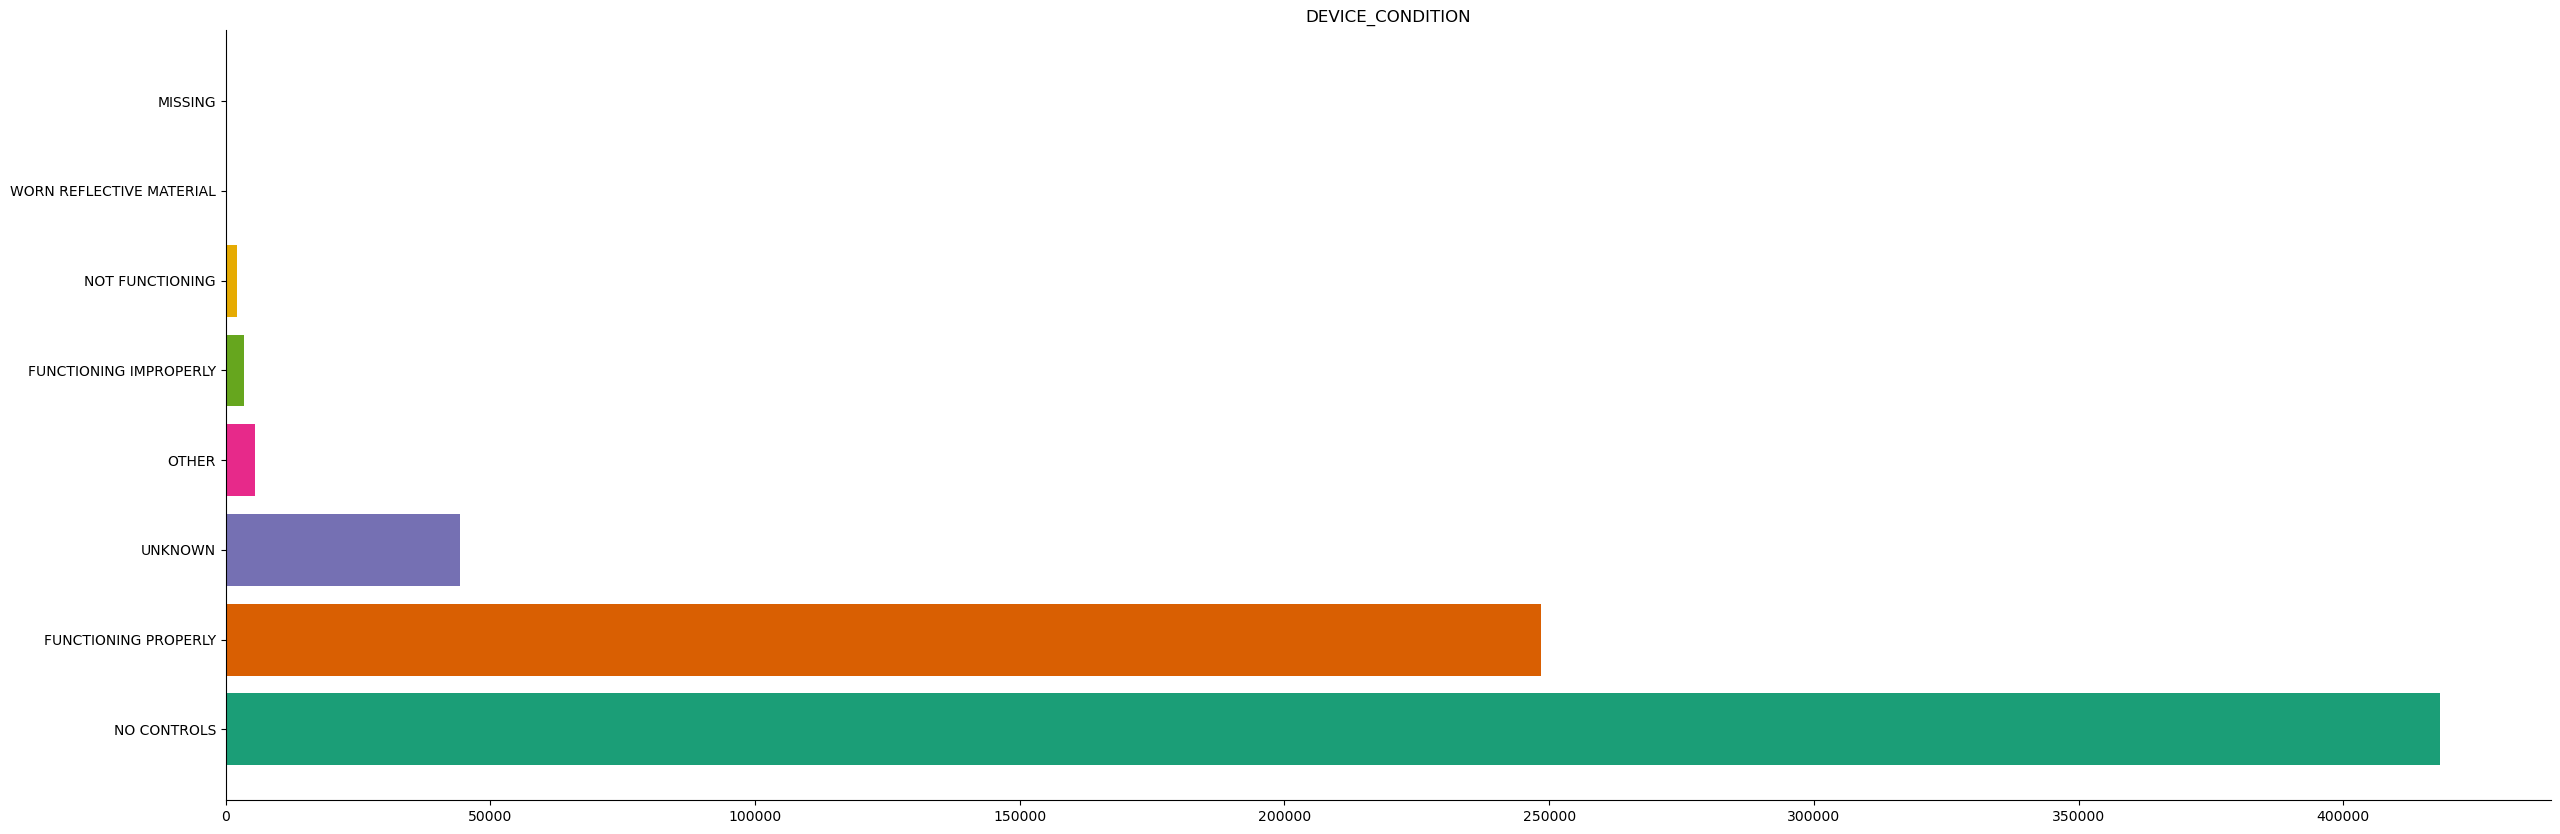

In [29]:
categorical_histogram(chicago, *['DEVICE_CONDITION'])

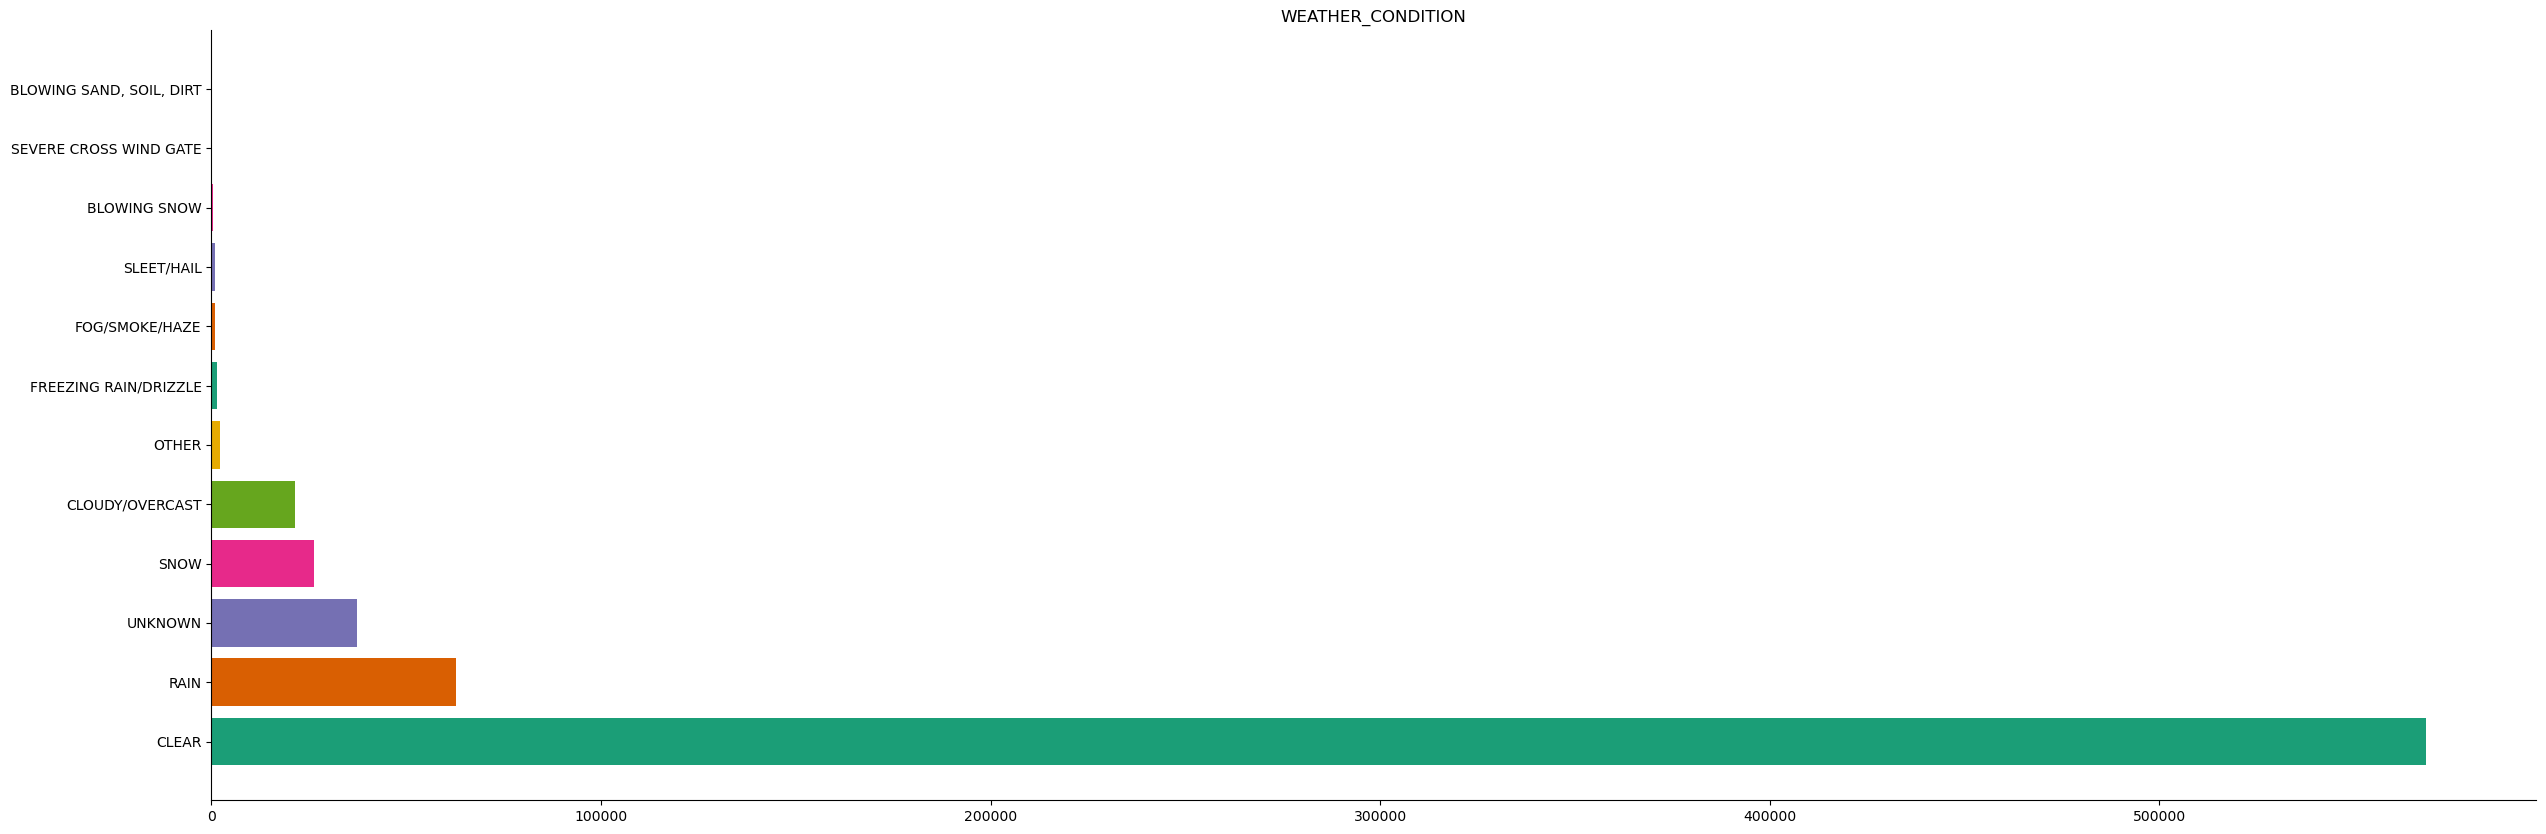

In [40]:
categorical_histogram(chicago, *['WEATHER_CONDITION'])

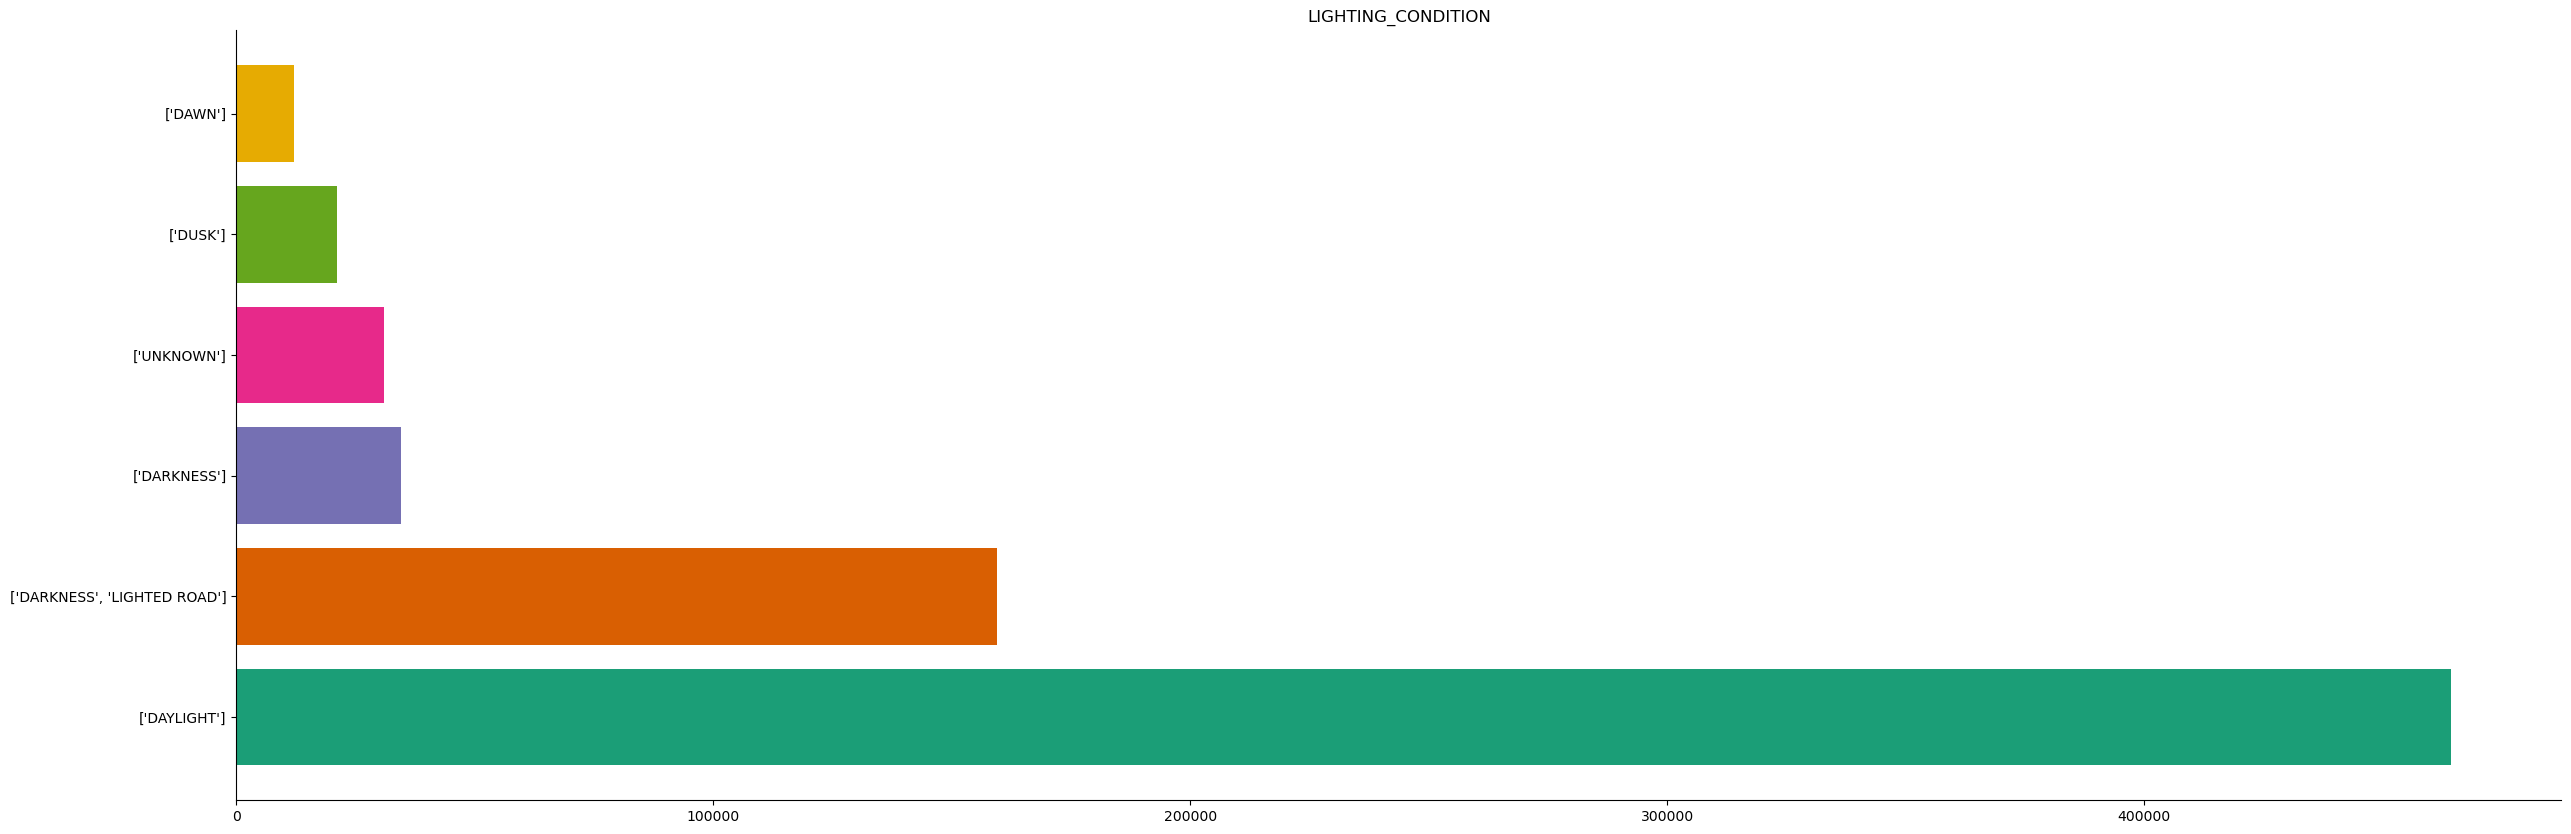

In [31]:
categorical_histogram(chicago, *['LIGHTING_CONDITION'])

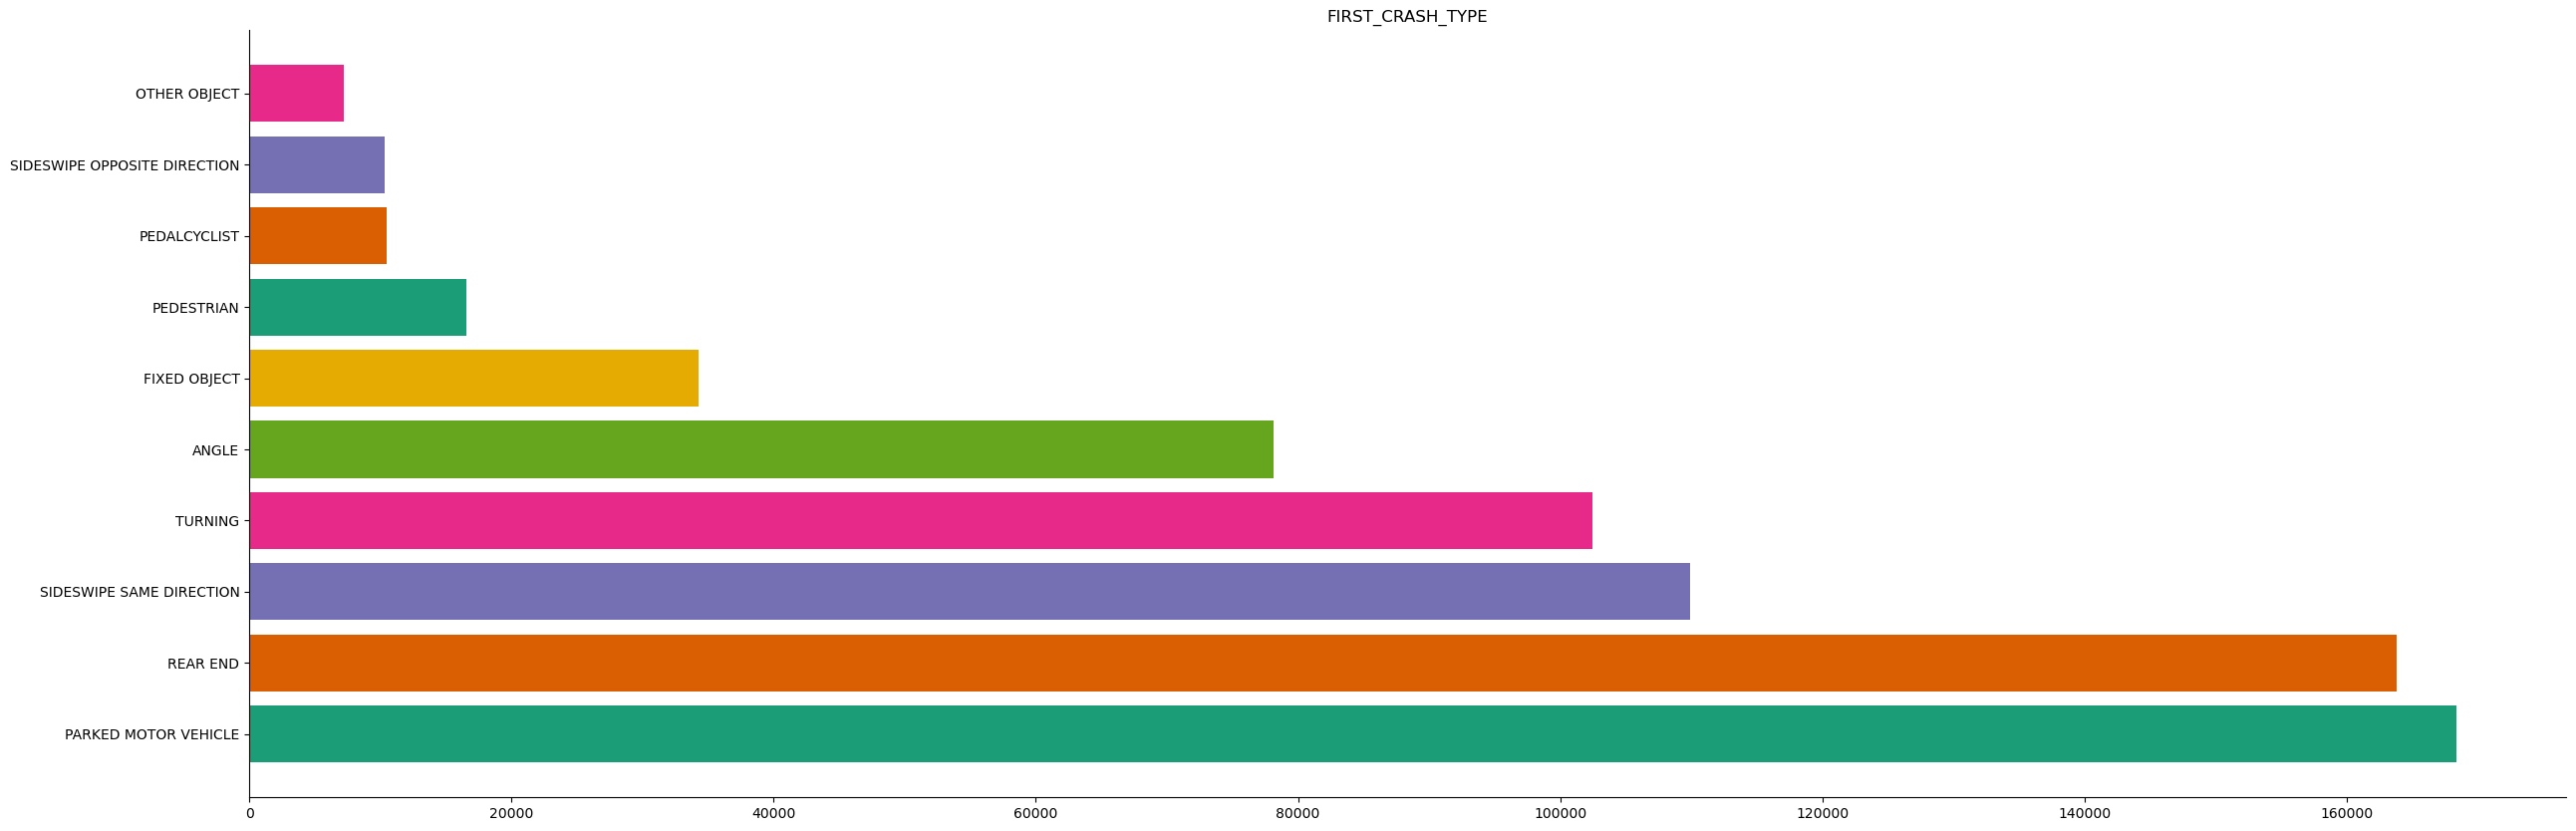

In [44]:
categorical_histogram(chicago, *['FIRST_CRASH_TYPE'], top_values = 10)

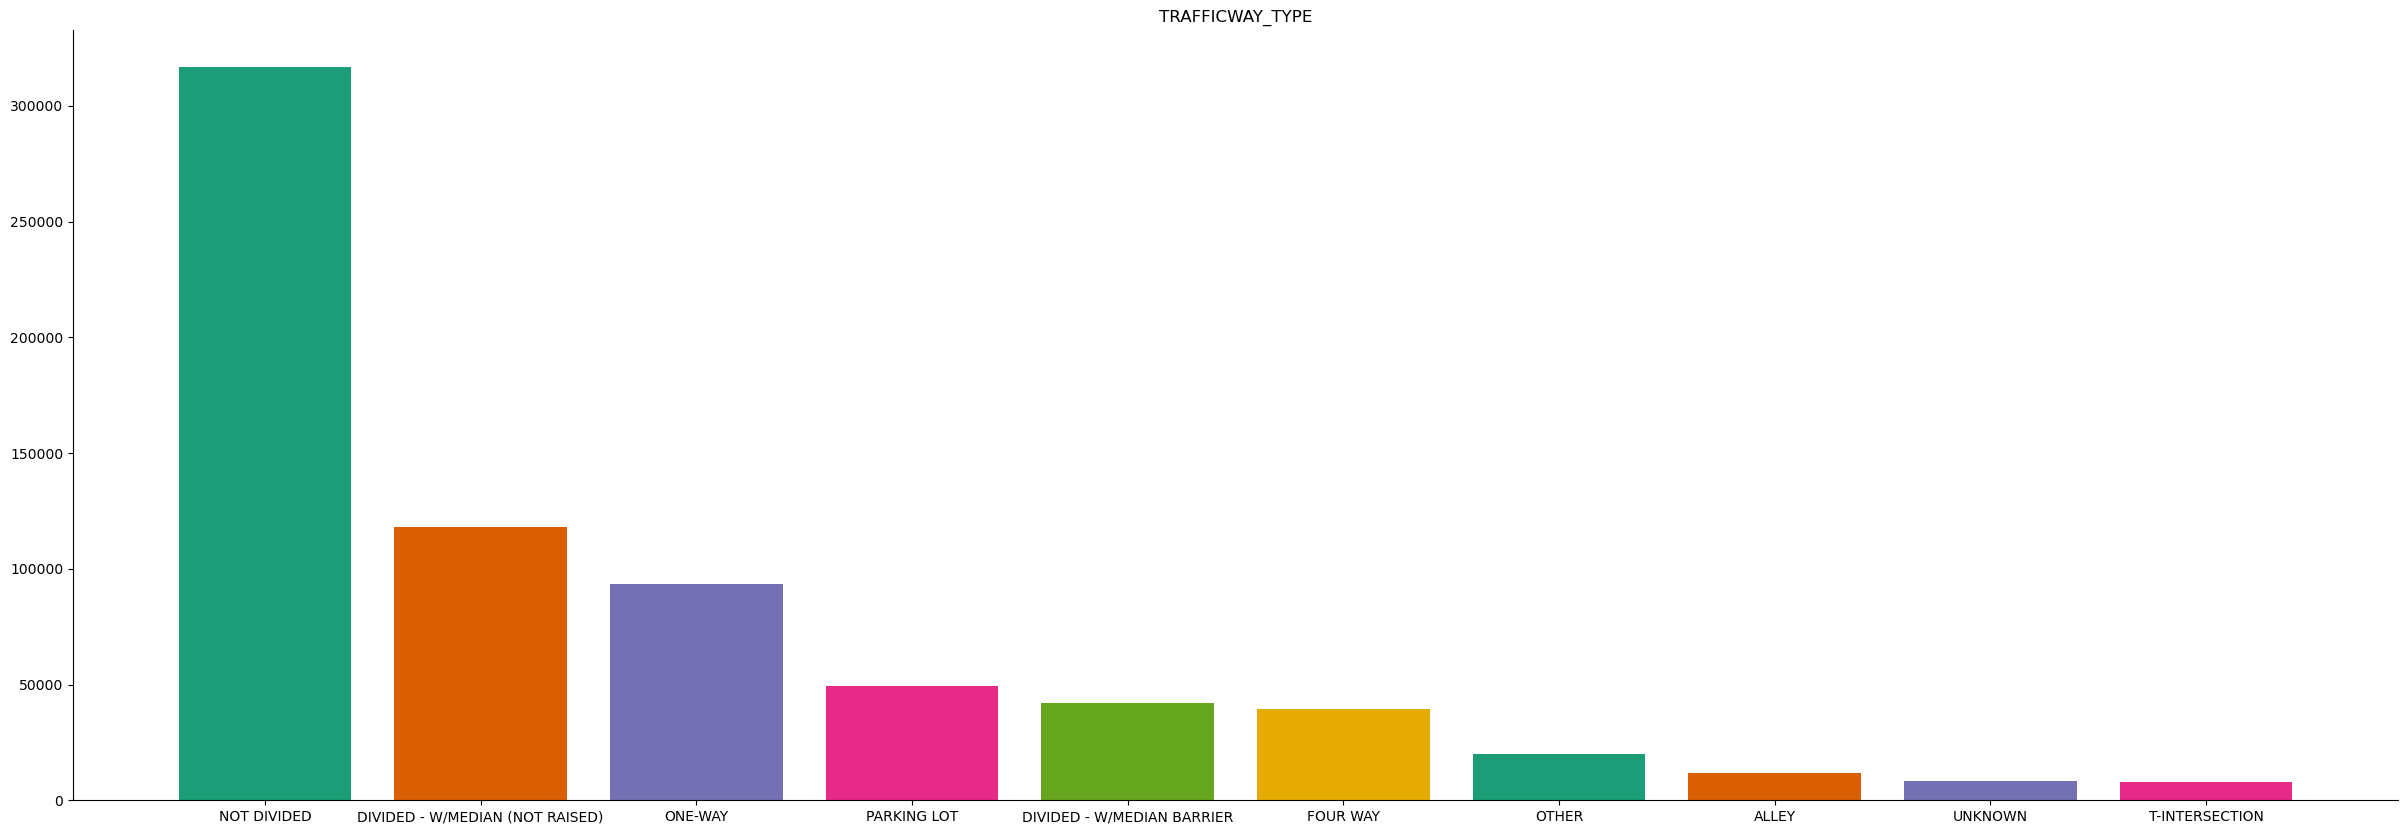

In [43]:
categorical_histogram(chicago, *['TRAFFICWAY_TYPE'], top_values = 10, direction  ='v')

In [ ]:
counts = chicago['CRASH_DAY_OF_WEEK'].value_counts()
weekdays = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

plt.figure(figsize=(20, 8))
plt.title("Number of accidents for each weekday")
sns.barplot(counts.index, counts.values, order=weekdays)
plt.xlabel("Weekday")
plt.ylabel("Value")
plt.show()

### Data Preprocessing

In [43]:
label_encoder = LabelEncoder()
for column in chicago.columns:
    chicago[column] = label_encoder.fit_transform(chicago[column])
chicago.head()

,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,...,NOT_RIGHT_OF_WAY_I,PRIM_CONTRIBUTORY_CAUSE,STREET_DIRECTION,DOORING_I,WORK_ZONE_I,NUM_UNITS,MOST_SEVERE_INJURY,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH
0,14,4,3,2,1,2,0,5,0,1,...,0,36,3,0,0,0,2,2,5,4
1,16,4,3,2,0,2,8,5,0,1,...,0,36,3,0,0,0,2,1,5,4
2,23,4,3,2,0,2,3,5,0,1,...,0,18,3,0,0,1,2,0,5,4
3,23,4,3,2,0,15,8,5,0,1,...,0,18,3,0,0,1,2,22,1,4
4,28,15,1,2,0,0,6,5,0,1,...,0,36,1,0,0,1,2,21,1,4


In [44]:
x_chicago = chicago.drop(columns=['MOST_SEVERE_INJURY'])
x_chicago.head()

,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,INTERSECTION_RELATED_I,NOT_RIGHT_OF_WAY_I,PRIM_CONTRIBUTORY_CAUSE,STREET_DIRECTION,DOORING_I,WORK_ZONE_I,NUM_UNITS,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH
0,14,4,3,2,1,2,0,5,0,1,0,0,36,3,0,0,0,2,5,4
1,16,4,3,2,0,2,8,5,0,1,0,0,36,3,0,0,0,1,5,4
2,23,4,3,2,0,2,3,5,0,1,1,0,18,3,0,0,1,0,5,4
3,23,4,3,2,0,15,8,5,0,1,0,0,18,3,0,0,1,22,1,4
4,28,15,1,2,0,0,6,5,0,1,1,0,36,1,0,0,1,21,1,4


In [45]:
y_chicago = chicago[['MOST_SEVERE_INJURY']]
y_chicago.head()

,MOST_SEVERE_INJURY
0,2
1,2
2,2
3,2
4,2


In [46]:
print(x_chicago.shape)
print(y_chicago.shape)

(720891, 20)
(720891, 1)


### Model

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x_chicago.copy(), y_chicago.copy(), test_size=0.2, random_state=42)
print(f'x_train shape: {x_train.shape}, y_train shape: {y_train.shape}')
print(f'x_test shape: {x_test.shape}, y_test shape: {y_test.shape}')

x_train shape: (576712, 20), y_train shape: (576712, 1)
x_test shape: (144179, 20), y_test shape: (144179, 1)


In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [55]:
kernel = DecisionTreeClassifier(random_state=42)
parameters = [{"criterion": ["gini", "entropy"], "max_depth": [5, 10, 15, 30]}]
model = GridSearchCV(kernel, parameters, cv=5, verbose=4, n_jobs=-1)
model

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': [5, 10, 15, 30]}],
             verbose=4)

In [56]:
model.fit(x_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 2/5] END .......criterion=gini, max_depth=5;, score=0.875 total time=   3.0s
[CV 3/5] END .......criterion=gini, max_depth=5;, score=0.876 total time=   3.1s
[CV 5/5] END .......criterion=gini, max_depth=5;, score=0.876 total time=   3.1s
[CV 1/5] END .......criterion=gini, max_depth=5;, score=0.877 total time=   3.1s
[CV 4/5] END .......criterion=gini, max_depth=5;, score=0.877 total time=   3.1s
[CV 2/5] END ......criterion=gini, max_depth=10;, score=0.876 total time=   5.7s
[CV 1/5] END ......criterion=gini, max_depth=10;, score=0.875 total time=   5.7s
[CV 3/5] END ......criterion=gini, max_depth=10;, score=0.875 total time=   5.8s
[CV 4/5] END ......criterion=gini, max_depth=10;, score=0.876 total time=   5.7s
[CV 5/5] END ......criterion=gini, max_depth=10;, score=0.875 total time=   5.8s
[CV 3/5] END ......criterion=gini, max_depth=15;, score=0.867 total time=   8.0s
[CV 1/5] END ......criterion=gini, max_depth=15;,

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': [5, 10, 15, 30]}],
             verbose=4)

In [57]:
print("Best parameters scores:")
print(model.best_params_)
print(f'Train score: {model.score(x_train, y_train)}')
print(f'Validation score: {model.score(x_test, y_test)}')

Best parameters scores:
{'criterion': 'entropy', 'max_depth': 5}
Train score: 0.8764513309936328
Validation score: 0.8767296208185658


In [61]:
print("Default scores:")
kernel.fit(x_train, y_train)
print("Train score:", kernel.score(x_train, y_train))
print("Validation score:", kernel.score(x_test, y_test))

Default scores:
Train score: 0.9950009710219312
Validation score: 0.780675410427316


In [62]:
pd.DataFrame(model.cv_results_).sort_values(by="rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
4,2.561168,0.311361,0.053903,0.009766,entropy,5,"{'criterion': 'entropy', 'max_depth': 5}",0.876325,0.876690,0.876186,0.876576,0.876021,0.876359,0.000246,1
0,3.008023,0.021318,0.064706,0.006788,gini,5,"{'criterion': 'gini', 'max_depth': 5}",0.876533,0.874938,0.876177,0.876576,0.876021,0.876049,0.000594,2
5,4.006849,0.109175,0.065632,0.008148,entropy,10,"{'criterion': 'entropy', 'max_depth': 10}",0.875363,0.876013,0.875171,0.876090,0.875466,0.875621,0.000365,3
1,5.570239,0.119596,0.172970,0.073627,gini,10,"{'criterion': 'gini', 'max_depth': 10}",0.875112,0.875849,0.874755,0.875821,0.875414,0.875390,0.000419,4
2,7.783636,0.205215,0.088273,0.009620,gini,15,"{'criterion': 'gini', 'max_depth': 15}",0.867829,0.868427,0.867117,0.867420,0.868842,0.867927,0.000634,5
6,5.419572,0.026073,0.074726,0.006173,entropy,15,"{'criterion': 'entropy', 'max_depth': 15}",0.866875,0.867083,0.866761,0.867732,0.866458,0.866982,0.000426,6
3,9.340110,0.538718,0.151893,0.009903,gini,30,"{'criterion': 'gini', 'max_depth': 30}",0.800378,0.803170,0.799379,0.799873,0.802613,0.801083,0.001520,7
7,5.502835,0.849961,0.083143,0.009033,entropy,30,"{'criterion': 'entropy', 'max_depth': 30}",0.796303,0.793919,0.792461,0.795955,0.793744,0.794476,0.001444,8


In [65]:
y_pred = kernel.predict(x_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'F1: {f1_score(y_test, y_pred, average="macro")}')
print(f'--------------------- TRAIN ---------------------')
print(classification_report(y_train, kernel.predict(x_train)))
print(f'--------------------- TEST ---------------------')
print(classification_report(y_test, y_pred))

Accuracy: 0.780675410427316
F1: 0.25458977496206703
--------------------- TRAIN ---------------------
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       629
           1       0.98      1.00      0.99      9792
           2       0.99      1.00      1.00    498521
           3       1.00      0.97      0.98     44149
           4       1.00      0.95      0.97     23621

    accuracy                           1.00    576712
   macro avg       0.99      0.98      0.99    576712
weighted avg       1.00      1.00      0.99    576712

--------------------- TEST ---------------------
              precision    recall  f1-score   support

           0       0.02      0.02      0.02       160
           1       0.06      0.08      0.07      2451
           2       0.90      0.88      0.89    124735
           3       0.21      0.23      0.22     10947
           4       0.07      0.09      0.08      5886

    accuracy                      

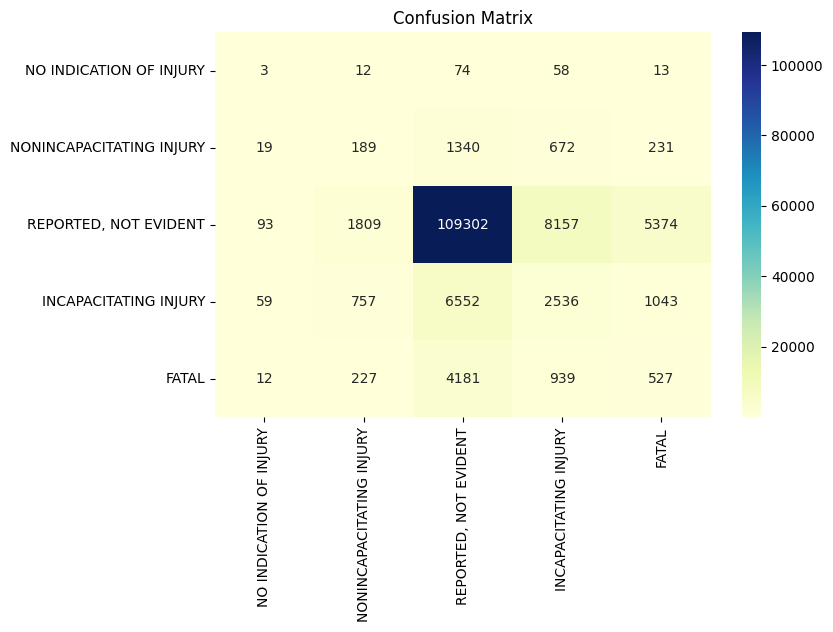

In [77]:
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
index = chicago_copy['MOST_SEVERE_INJURY'].unique()
columns = chicago_copy['MOST_SEVERE_INJURY'].unique()
conf_matrix = pd.DataFrame(data=cm, columns=columns, index=index)
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix")
plt.show()